In [4]:
import matplotlib.pyplot as plt
import math
from math import log
import pandas as pd
import numpy as np
import random

### Load data

#### MovieLens

In [5]:
df_links = pd.read_csv('data/movielens/ml-latest-small/links.csv')
df_movies = pd.read_csv('data/movielens/ml-latest-small/movies.csv')
df_ratings = pd.read_csv('data/movielens/ml-latest-small/ratings.csv')
df_tags = pd.read_csv('data/movielens/ml-latest-small/tags.csv')

In [6]:
df_tags.head()

,userId,movieId,tag,timestamp
0,2,60756,funny,1445714994
1,2,60756,Highly quotable,1445714996
2,2,60756,will ferrell,1445714992
3,2,89774,Boxing story,1445715207
4,2,89774,MMA,1445715200


#### Instacart

In [7]:
#instacart
df_products = pd.read_csv('data/instacart/products.csv')
df_carts_prior = pd.read_csv('data/instacart/order_products__prior.csv')
df_carts_train = pd.read_csv('data/instacart/order_products__train.csv')
df_carts = pd.concat([df_carts_prior, df_carts_train])
df_carts.head()

,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0


In [8]:
df_carts.head()

,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0


In [9]:
# transforms the data into a long list of lists, each containing product IDs 
# that were purchased in the same order
carts = df_carts[['order_id', 'product_id']].groupby('order_id')['product_id'].apply(list).to_list()
carts[0:3]

[[49302, 11109, 10246, 49683, 43633, 13176, 47209, 22035],
 [33120, 28985, 9327, 45918, 30035, 17794, 40141, 1819, 43668],
 [33754, 24838, 17704, 21903, 17668, 46667, 17461, 32665]]

### Ranking

Recommend 10 movies based on recent ratings

Use techniques to make sure the recommendation is reliable

,movieId,rating,title,genres
277,318,3.978067,"Shawshank Redemption, The (1994)",Crime|Drama
257,296,3.853323,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller
314,356,3.848119,Forrest Gump (1994),Comedy|Drama|Romance|War
224,260,3.833879,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Sci-Fi
1938,2571,3.833853,"Matrix, The (1999)",Action|Sci-Fi|Thriller
2224,2959,3.826191,Fight Club (1999),Action|Crime|Drama|Thriller
510,593,3.819460,"Silence of the Lambs, The (1991)",Crime|Horror|Thriller
659,858,3.808876,"Godfather, The (1972)",Crime|Drama
461,527,3.807629,Schindler's List (1993),Drama|War
46,50,3.799538,"Usual Suspects, The (1995)",Crime|Mystery|Thriller


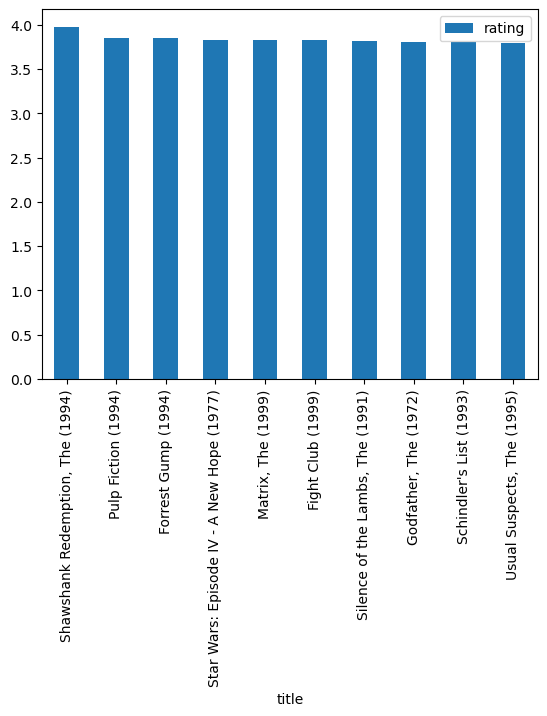

In [10]:
df_ratings = pd.read_csv('data/movielens/ml-latest-small/ratings.csv')

k = 300
u = df_ratings["rating"].mean()
def rankedByDampedMean(ratings):
    N = len(ratings)
    sums = np.sum(ratings)
    res = (sums + k*u) / (N + k) 
    return res


df = pd.DataFrame(data=df_ratings)

dank = df_ratings.groupby("movieId")["rating"].apply(list).map(rankedByDampedMean)

temp = pd.merge(pd.DataFrame(dank), df_movies, on="movieId", how="left").sort_values("rating", ascending=False)[0:10]

temp.plot(x="title", y="rating", kind="bar")
temp

### Association rule mining

Calculate the number of frequent itemsets with varying levels for support

Try to guess what value of minimum support would be reasonable

Calculate association rules and find the one whose subsequent item has the least support (the one more in the tail)

#### Priori (Apyori)

In [11]:
from apriori_python import apriori

In [12]:
association_rules = apriori(carts, min_support=XXX, 
                            min_confidence=XXX,
                            min_lift=XXX, min_length=XXX)
association_rules = list(association_rules)

NameError: name 'XXX' is not defined

In [ ]:
association_rules

In [ ]:
idx = 5 #prints the 5th association rule

rule = association_rules[idx]
frequent_itemset = rule.items
support = rule.support

antecedent = rule.ordered_statistics[0].items_base
antecedent = [df_products.iloc[a-1]['product_name'] for a in antecedent]
consequent = rule.ordered_statistics[0].items_add
consequent = [df_products.iloc[c-1]['product_name'] for c in consequent]
lift = rule.ordered_statistics[0].lift
confidence = rule.ordered_statistics[0].confidence

print(f'{antecedent}->{consequent}')
print(f'support = {support}')
print(f'confidence = {confidence}')
print(f'lift = {lift}')

#### FP-growth (mlxtend)

In [ ]:
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, fpmax, fpgrowth
from mlxtend.frequent_patterns import association_rules

In [ ]:
# encode the dataset into a orders x items binary sparse matrix
te = TransactionEncoder()
te_data = te.fit(carts).transform(carts, sparse=True)
df = pd.DataFrame.sparse.from_spmatrix(te_data, columns=te.columns_)
# product indices must either start from 0 or be strings
df.columns = [str(i) for i in df.columns] 
# alternatively, reduce ids by 1
#carts_modified = [[carts[l][i]-1 for i in range(0, len(carts[l]))] for l in range(0, len(carts))]

In [ ]:
frequent_itemsets = fpgrowth(df, min_support=xxxx, use_colnames=True, verbose=1)

In [ ]:
rules = association_rules(frequent_itemsets, metric='confidence', min_threshold=xxxx)
rules